# NAC3 - Aprendizado de maquina

| Nome dos Integrantes     | RM             | Turma   |
| :----------------------- | :------------- | :-----: |
| Guilherme Datilio        | RM82522        |  4SIS   |
| Adelson Petronilho       | RM83354        |  4SIS   |


## Data de entrega final

Será considerado para avaliação e correção o ultimo commit do `** dia 11/09 (domingo) **`

`O grupo deve responder ao Google forms` : [https://forms.gle/EEYUkZiWcJ6Xduah6](https://forms.gle/EEYUkZiWcJ6Xduah6)


## Rubrica 

Os critérios de avaliação do projeto será conforme a rubrica.


- R1: Exploração de Dados (Até 1 ponto)
- R2: Preparação de Dados (Até 2 ponto)
- R3: Desenvolvimento do Modelo (Até 1 ponto)
- R4: Treinamento e Teste do Modelo (Até 2 ponto)
- R5: Validação e Otimização do Modelo (Até 3 ponto)
- R6: Conclusões Finais (Até 1 ponto)
- R7: Deploy (Até 2 pontos *extra) 

Nota_final = R1 + R2 + R3 + R4 + R5 + R6 + R7


``Siga todas as instruções deste noteboook, mas não limite suas análises apenas ao conteúdo visto em aula.``


Nas celulas **Seu Código aqui...** significa que é necessário realizar a implementação de algum código. Utilize quantos blocos julgar necessário para criar o código de resposta.

Nas celulas **Responda** significa que é nessário uma resposta clara e objetiva (pode ser por texto, gráfico, imagem...) para a pergunta.

**Respeite a rubrica e não responda fora de ordem ou sequência**



## Análise preditiva de doeça cardíaca em pacientes

![](coracao.jpg)



Vamos trabalhar com um CONJUNTO DE DADOS DE DOENÇA CARDÍACA afim de ``predizer a presença ou não de doenças do coração em pacientes``.    

[dataset: https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive](https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive).


## 1. Exploração de Dados

Carregue o dataset e faça uma visualização das primeiras linhas (identificação básica apenas confirmar se a base foi carregada corretamente).


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
url = "heart_statlog_cleveland_hungary_final2.csv"



**Pergunta:** Apresente (Escreva) uma descrição dos atributos (colunas) e seu significado:

Exemplo: 

- id: Representa o fabricante
- fuel_type: tipo de combustível (pode ser Gasolina ou Disel)
- price: Representa o valor do carro (**Variável Alvo, atributo que será predito pelo modelo de ML**)

**Responda**

Sua resposta aqui.......

* Age: Representa a idade do paciente
* Sex: Representa o genêro do paciente
* Chest pain: Representa o nivel de dor no peito
* Resting BPS: Representa a velocidade do batimento em descanso
* Cholesterol: Representa o nível de colesterol
* Fasting blood sugar: Representa açúcar no sangue em jejum
* Resting ecg: Representa o resultado do eletrocardiografia 
* Max heart rate: Representa o batimento cardiaco máximo
* Exercise angina: Representa Angina induzida pelo exercício
* Oldpeak: Representa o pico antigo 
* ST slope: Inclinação do exercicio do eletrocardiograma
* Target: Representa o diagnostico positivo ou negativo para doenças no coração

### Análise profunda dos dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos para compreeder a natureza do problema.

In [3]:
df = pd.read_csv(url)

df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,class
0,40,male,2,140,289,0,0,172,no,0,1,Normal
1,49,female,3,160,180,0,0,156,no,10,2,heart disease
2,37,male,2,130,283,0,1,98,no,0,1,Normal
3,48,female,4,138,214,0,0,108,yes,15,2,heart disease
4,54,male,3,150,195,0,0,122,no,0,1,Normal


In [4]:
df.shape

(1190, 12)

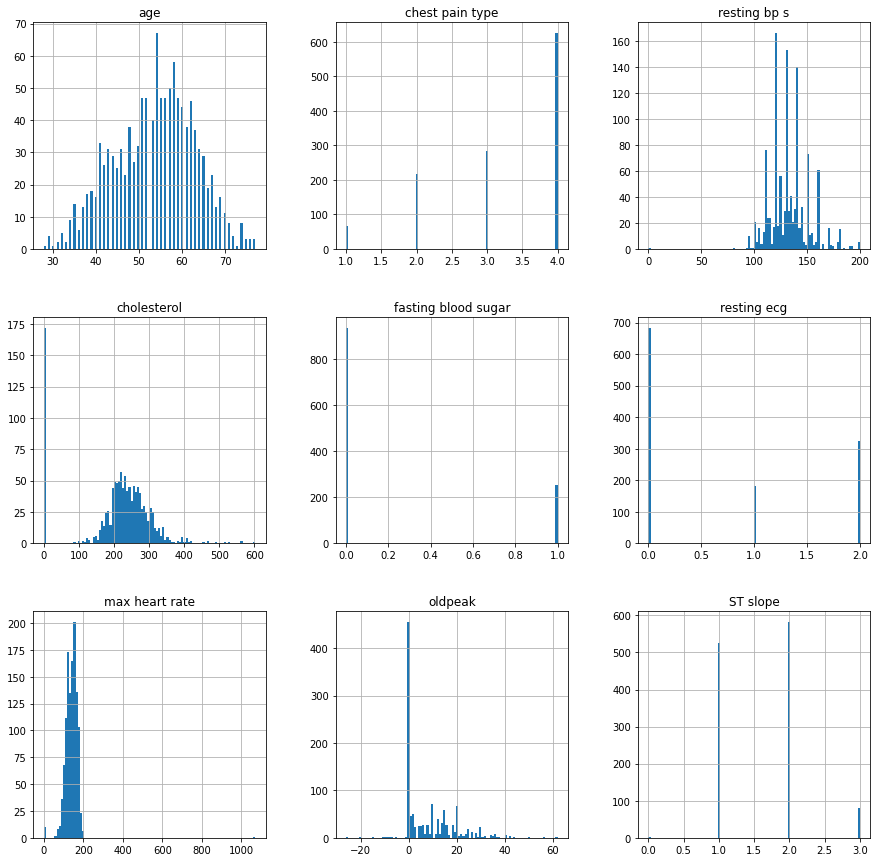

In [5]:
df.hist(bins=100, figsize=(15, 15))
plt.show()

**Perguntas:** 

1. Qual a relação entre a idade e colesterol?
2. O indice açucar no sangue > 120 mg/dl é mais frequênte em homens ou mulheres?
3. Qual a distribuição de idade do dataset?
4. Pessoas com presença de doença cardiaca são em sua maioria do grupo masculino ou feminino? 

**Respostas:**


Sua resposta aqui.... Lembre-se de relacionar sua resposta com os dados. Elabore análises gráficas para te auxiliar.


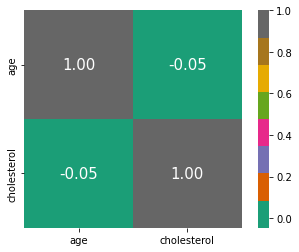

In [6]:
#1. Qual a relação entre a idade e colesterol?
#R: Não há relação, vide evidência abaixo.

cols = ['age', 'cholesterol']
corr_matx = df[cols].corr()
heatmap = sns.heatmap(corr_matx,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols,cmap='Dark2')

In [7]:
#2. O indice açucar no sangue > 120 mg/dl é mais frequênte em homens ou mulheres?
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['sex'] = labelencoder.fit_transform(df['sex'])

sm = df[['fasting blood sugar', 'sex']]
smRename = sm.rename(columns={'fasting blood sugar': 'sugar'})
StrSm = smRename[(smRename.sex == 1) & (smRename.sugar == 1)].count().sex

print('Homens com índice de açucar >120 mg/dl: ' + str(StrSm))

sf = df[['fasting blood sugar', 'sex']]
sfRename = sf.rename(columns={'fasting blood sugar': 'sugar'})
StrSf = sfRename[(sfRename.sex == 0) & (sfRename.sugar == 1)].count().sex

print('Mulheres com índice de açucar >120 mg/dl: ' + str(StrSf))

Homens com índice de açucar >120 mg/dl: 217
Mulheres com índice de açucar >120 mg/dl: 37


age
28     1
29     4
30     1
31     2
32     5
33     2
34     9
35    14
36     6
37    13
38    17
39    18
40    16
41    33
42    26
43    31
44    29
45    25
46    31
47    23
48    38
49    27
50    32
51    47
52    47
53    40
54    67
55    47
56    47
57    50
58    58
59    47
60    44
61    38
62    46
63    37
64    31
65    29
66    19
67    23
68    13
69    16
70    11
71     8
72     4
73     1
74     8
75     3
76     3
77     3
dtype: int64


array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

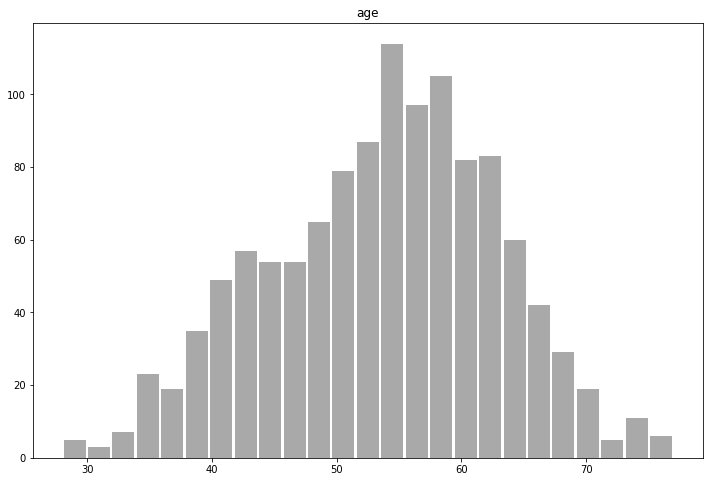

In [8]:
#3. Qual a distribuição de idade do dataset?

print(df.groupby('age').size())

df.hist(column='age', bins=25, grid=False, figsize=(12,8), color='darkgrey', zorder=2, rwidth=0.9)

In [9]:
#4. Pessoas com presença de doença cardiaca são em sua maioria do grupo masculino ou feminino?

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['sex'] = labelencoder.fit_transform(df['sex'])

sm = df[['class', 'sex']]
smRename = sm.rename(columns={'class': 'disease'})
StrSm = smRename[(smRename.sex == 1) & (smRename.disease == 'heart disease')].count().sex

print('Homens com Doenças cardiacas: ' + str(StrSm))

sf = df[['class', 'sex']]
sfRename = sm.rename(columns={'class': 'disease'})
StrSf = sfRename[(sfRename.sex == 0) & (sfRename.disease == 'heart disease')].count().sex

print('Mulheres com Doenças cardiacas: ' + str(StrSf)) 
 

Homens com Doenças cardiacas: 559
Mulheres com Doenças cardiacas: 70


## 2. Preparação dos Dados

**Lembre-se:** Trate esses dados dentro do contexto do problema. ``Justifique suas escolhas``.

### Análise de valores inválidos

Faça a análise de dados ausente, dados nulos e dados iguais a 0(zero).

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  1190 non-null   int64 
 1   sex                  1190 non-null   int64 
 2   chest pain type      1190 non-null   int64 
 3   resting bp s         1190 non-null   int64 
 4   cholesterol          1190 non-null   int64 
 5   fasting blood sugar  1190 non-null   int64 
 6   resting ecg          1190 non-null   int64 
 7   max heart rate       1190 non-null   int64 
 8   exercise angina      1190 non-null   object
 9   oldpeak              1190 non-null   int64 
 10  ST slope             1190 non-null   int64 
 11  class                1190 non-null   object
dtypes: int64(10), object(2)
memory usage: 111.7+ KB


**Pergunta:** Foram localizados dados ausente, dados nulos e dados iguais a 0(zero)? Se existe, como foram tratados (removidos ou mantidos ou substituidos ou ....)? 

**Resposta:**

Não encontramos dados ausentes e/ou nulos, porem há dados iguais a zero que representam decisões binárias como por exemplo o sexo masculino é representado por "1" e o sexo feminino por "0".

### Análise de Outliers

Faça a análise de outliers.

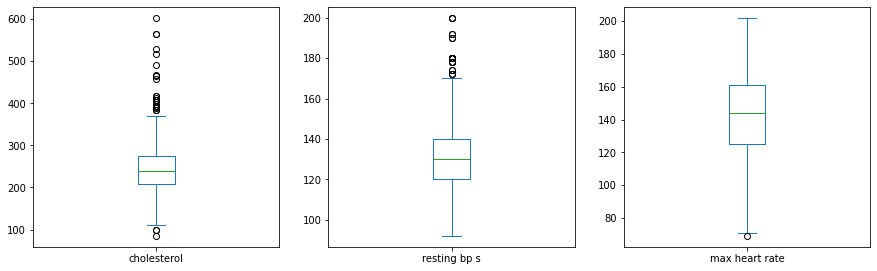

In [11]:

df = df.loc[~((df['cholesterol'] == 0) | (df['resting bp s'] == 0)| (df['max heart rate'] == 0)|(df['max heart rate'] >= 250))]
dfOut = df[['cholesterol','resting bp s','max heart rate']]



dfOut.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15, 15))
plt.show()


**Pergunta:** Foram localizados outliers? Se existe, como os dados foram tratados (removidos ou mantidos)? 

**Resposta:**


Removemos os outliers que eram iguais a "0" para os casos acima('cholesterol','resting bp s','max heart rate'), pois não seriam dados úteis.

### Tratamento de dados Paramétricos

Faça o tratamento dos atributos categoricos, se existir. Manipule de forma conveniente para ser interpretado como um dado numérico.

In [12]:
#Seu Código aqui...
df.drop

<bound method DataFrame.drop of       age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate exercise angina  \
0                       0            0             172              no   
1                       0            0             156              no   
2

**Pergunta:** Quais são os atributos categoricos? Qual foi a técnica de preprocessamento utilizada? 

**Resposta:**

Sua resposta aqui.....

### Normalização dos dados

Faça a manipulação adequada para normalizar os dados, se necessário.

In [13]:
#Seu Código aqui...


**Pergunta:** Os dados foram normalizados? Qual foi a técnica de preprocessamento utilizada? 

**Resposta:**

Sua resposta aqui.....

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina? 

**Resposta:**

    [ ] Aprendizado por reforço
    [x] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [x] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 3 modelos de algoritmos de ML para ser testado.

**Resposta:**

1. algoritimo KNN
2. algoritimo Logistic regression
3. algoritimo Bernoulli Naive Bayes classifier



**Pergunta:** Explique como cada algoritmo funciona.



**Resposta:**

1. KNN é considerado um dos algoritmos mais simples dentro da categoria de aprendizagem supervisionada sendo muito utilizado para problemas de classificação, porém também pode ser utilizado em problemas de regressão.
2. É uma técnica que consiste em representar um conjunto de dados por meio de uma reta.
3. Este procedimento ajusta até 10 diferentes modelos de regressão para duas variáveis, sendo uma dependente e uma independente.

### Dataset dos dados tratados 

Crie um subset dos dados apenas com os atributos que serão utilizados e exiba as primeiras linhas.

In [14]:
entradas = df[['chest pain type', 'age',]]
classes = df['class']

entradas.head()


,chest pain type,age
0,2,40
1,3,49
2,2,37
3,4,48
4,3,54


### Definição de X e Y

Separe os subsets dos atributos em Y e X :

- Y = atributo dependente (alvo)
- X = Atributo independente (entradas)

In [15]:
X = df[['chest pain type']]
Y = df['age']
print(f"Formato das tabelas de dados {X.shape} e saidas {Y.shape}")

Formato das tabelas de dados (1007, 1) e saidas (1007,)


### Divisão em treino e teste.

entradas_treino.shape, entradas_teste.shape

In [16]:
from sklearn.model_selection import train_test_split

entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2)

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")

Formato das tabelas de dados de treino (805, 2) e teste (202, 2)


## 4. Treinamento e teste do modelo

Defina a métrica de performance para avaliação dos modelos de ML

**Resposta:**


Sua resposta aqui.......

### Treinamento e teste

Faça o treinamento e teste de dos 3 algoritmos escolhidos, aplique no treinamento a validação cruzada para um kfold de 5.

### Algoritmo 1

In [17]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
# treina o modelo com knn=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(entradas_treino, classes_treino)
y_pred = knn.predict(entradas_teste)

# resultado da acuracia
metrics.accuracy_score(classes_teste, y_pred)

0.7673267326732673

### Algoritmo 2

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(entradas_treino, classes_treino)
y_pred = logreg.predict(entradas_teste)
metrics.accuracy_score(classes_teste, y_pred)

0.7227722772277227

### Algoritmo 3

In [19]:
from sklearn.naive_bayes import BernoulliNB

classifer = BernoulliNB()

classifer.fit(entradas_treino, classes_treino)

y_pred = classifer.predict(entradas_teste)
metrics.accuracy_score(classes_teste, y_pred)

0.5495049504950495

Sumarize na tabela abaixo os resultados obtidos dos modelos de ML para o conjuntos de dados de treino e de testes

**Resposta:**

|                     | algoritmo1 | algoritmo2 | algoritmo3 |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| treino |      X           |      X                       |   X              |
| teste  |      X            |      X                       |   X              |


**Pergunta:** Qual foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:**

## 5. Validação e Otimização do Modelo

Faça a otimização dos modelos, tunning dos hiperparametros, utilize uma das técinicas: **RandomSearchCV** ou **GridSearchCV**.


Após a otimização dos parametros, treine novamente os 3 algoritmos de ML  utilizando os parametos de otimização e compares seus resultados.


**Pergunta:** Qual a técnica escolhida? Por que?

**Resposta:**

### Algoritmo 1

In [20]:
#import all necessary libraries
import sklearn
from sklearn.metrics import classification_report 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(entradas_treino, classes_treino) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(entradas_teste) 
   
# print classification report 
print(classification_report(classes_teste, grid_predictions)) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
               precision    recall  f1-score   support

       Normal       0.79      0.69      0.74       111
heart disease       0.67      0.77      0.72        91

     accuracy                           0.73       202
    macro avg       0.73      0.73      0.73       202
 weighted avg       0.73      0.73      0.73       202



### Algoritmo 2

In [21]:
#Seu Código aqui...



### Algoritmo 3

In [22]:
#Seu Código aqui...


Sumarize na tabela abaixo os resultados obtidos dos modelos de ML para o conjuntos de dados de treino e de testes

**Resposta:**

|                     | algoritmo1 | algoritmo2 | algoritmo3 |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| treino |      X           |      X                       |   X              |
| teste  |      X            |      X                       |   X              |


**Pergunta:** Qual dos algoritmos obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:**

## Salvando o modelo desenvolvido

Configure o modelo selecionado com os parâmetros otimizados obtidos anteriormente e salve

```python
# exemplo de como salvar o modelo "model" no arquivo "modelsave.pkl"

# import lib
import pickle

# salvar
with open('modelsave.pkl', 'wb') as file:
    pickle.dump(model, file)

```

In [23]:
#Seu Código aqui...



## 6. Conclusões finais

Ufa!!... Chegamos ao final deste projeto. Parabéns! De forma simplificada e completa passamos por todas as etapas de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.

**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Não, pois não chegou a ultrapassar 80% de acurácia.

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Talvez utilizando outros algorítimos para melhor trabalhar os dados.

**Pergunta:**: As etapas de desenvolvimento se aplicam para um problema de classificação? Justifique:

**Resposta**: Talvez, podemos utilizar para classificar pessoas com diferentes tipos de "Target"

## 7. Deploy 

Etapa bonûs (Até 2 pontos *extra)

Essa parte não é obrigatória, por esse motivo é considerada pontuação extra na nota para quem desenvolver.


Faça o deploy do modelo de ML desenvolvido em um webserver. Como sugestão utilize Flask ou FastAPI ou Django. Procure por referências na web.